# SI 370 - Homework 4: Categorical Data and Regression Analyses

## Objectives

The objectives of this homework are to give you practical experience with the following techniques:
1. Categorical Data Analysis
 * Contingency tables _<font color="red"> --> crosstab shows distribution of counts across instances of two variables _</font>
 * Mosaic plots _<font color="red"> --> a graphical crosstab _</font>
 * $\chi^2$ _<font color="red"> --> the standard statistical test, compares expected vs. observed (AKA: Pearson statistics) _</font>
2. Correlation, Regression and Outliers
 * Comparing parametric and non-parametric correlation _<font color="red"> --> Parametric = assumptions made about population, "Pearson" coefficient used ... Nonparametric test = no info about the population, "Spearman" rank used _</font>
 * Residuals _<font color="red"> --> measure how far y values are from the prediction _</font>
 * Outliers and Leverage points _<font color="red"> --> outlier = high or low on the y-axis ... leverage point = far away on the x-axis  _</font>
 * Influential point _<font color="red"> --> a point that can change the model (e.g. regression) when it is present or removed (by increasing the residual of all other points) ...
 NOTE: leverage points can be influential (but not necessarily!), while outliers tend not to be influential _</font>
 * DFITTS _<font color="red"> --> "influence diagnostic": measures how much the model would move without the point _</font>
 * Cook's Distance: _<font color="red"> --> another "influence diagnostic" ... very similar to DFITTS _</font>
 * Generating and interpreting diagnostic regression plots _<font color="red"> --> see 4 plots presented in lab _</font>
 * Cleaning outliers _<font color="red"> --> Strategy 1: use robust statistics (e.g. median absolute statistics) ... Strategy 2: keep the middle 95 percent (e.g. 2.5%-97.5%) _</font>
 * Normalization _<font color="red"> --> makes normal distribution via restricted range (e.g. [-1,1]) ... Types of normalization: by max, by sum, by mapping, by log, by z-score _</font>

You will also learn some techniques to annotate your Searborn charts.

This homework assignment consists of two questions, each of which focuses on a different data set.  Each question has multiple parts: Question 1 has 5 parts; Question 2 has 10 parts.

_<font color="red">NOTE: You should use Markdown cells to enclose all textual content, including explanations, discoveries, and conclusions._</font>

## Please fill in...
### * Your name: AJ Goldstein
### * People you worked with:  I worked by myself

## **Submission Instructions:**
After completing this homework, you should turn in two files via Canvas > Assignments:
1. A Jupyter Notebook file named hw4-YOUR_UNIQUE_NAME.ipynb.  Please observe the following requirements:
    * This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code.
    * You should use Markdown cells to enclose all textual content, including explanations, discoveries, and conclusions. 
    * Irrelevant code and results should be deleted prior to submission.
2. An html file named hw4-YOUR_UNIQUE_NAME.html showing the preview of the above Jupyter Notebook. To create this file, select File > Download as HTML. We want this in case something breaks when we load your notebook.  This will let us see what you saw when you were done.

# Load everything up that we need

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Image
from IPython.core.display import HTML 

# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# 1. Categorical Data Analysis

We want to return to the comic characters dataset and continue our analysis. You should already have the "comic_characters.csv" file from Homework 2.  If you need to download it again, you can grab it from the Files -> Datasets folder in Canvas. Import it into your Jupyter Notebook as a Pandas DataFrame.

This time, we want to determine if comic books have any preference/bias for combination of sex and alignment (called "align" in our table). That is, whether they are biased in whether males or females are assigned heroic (good), villainous (bad), or netural roles. Note that because of lack of enough observations, we want to restrict sex to only female and male characters, and alignment to only good, bad, and neutral characters.

In [17]:
# Import Data
comicCharacters = pd.DataFrame.from_csv('comic_characters.csv', index_col="id")
comicCharacters['align'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan,
       'Reformed Criminals'], dtype=object)

### 1(a) Restrict the dataframe to only female and male, and good, bad, and neutral characters.

In [18]:
sexAlignChars = comicCharacters[(comicCharacters['align'].isin(['Good Characters', 'Neutral Characters', 'Bad Characters'])) & (comicCharacters['sex'].isin(['Male Characters', 'Female Characters']))]

### 1(b) To answer the main question, we need to generate a contingency table of sex, and align(ment). Create a version without the totals row/column first and keep that around (give it a name like comicCrosstab; you'll need it later)

In [19]:
comicCrosstab = pd.crosstab(sexAlignChars.loc[:,'sex'], sexAlignChars.loc[:,'align'])
comicCrosstab

align              Bad Characters  Good Characters  Neutral Characters
sex                                                                   
Female Characters            1573             2490                 836
Male Characters              7561             4809                1799

### 1(c) Generate a mosaic plot of the contingency table. Report patterns you are seeing in the data?

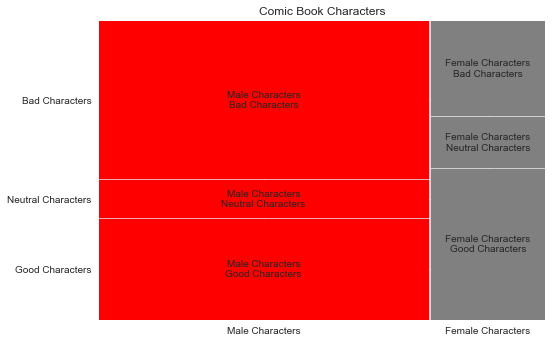

In [20]:
props = lambda key: {'color': 'r' if 'Male Characters' in key else 'gray'}
comicMosaic = mosaic(sexAlignChars, ['sex', 'align'], title = 'Comic Book Characters', properties = props)

_<font color="red"> It seems that there are many more males in "Bad Character" roles than females. Conversely, women are much more likely than men to be in good character roles. Altogether, there are many more male characters than female characters. _</font>

### 1(d) Now, we want to use scipy.stats.chi2_contingency() run $\chi^2$ test on the observations, generate the expected table, and explain the results. Then interpret the results. You can use the information from your table and plot above.

In [21]:
chi2, p, dof, expected = stats.chi2_contingency(comicCrosstab)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(expected)
# NOTE: expected frequencies are computed based on marginal sums
# example: http://www.stat.wmich.edu/s216/book/node113.html

chi2 =  664.7474677
p-val =  4.48664243309e-145
degree of freedom =  2
Expected:


0            1            2
0  2346.730963  1875.278005   676.991032
1  6787.269037  5423.721995  1958.008968

In [22]:
# side-by-side comparison
comicCrosstab

align              Bad Characters  Good Characters  Neutral Characters
sex                                                                   
Female Characters            1573             2490                 836
Male Characters              7561             4809                1799

_<font color="red"> Intepretation: based on the chi2 and p-value above, the number of male/female characters in different alignment types appear to vary significantly _</font>

### 1(e) We would like to understand if publishers vary by the way they assign male/female/good/bad/netural.  Perform the analysis as above, this time using publisher as the "row." (a mosaic plot may not be so helpful here).

In [23]:
publisherCT = pd.crosstab((sexAlignChars.loc[:,'sex'], sexAlignChars.loc[:,'align']), sexAlignChars.loc[:,'publisher'])
publisherCT

publisher                               DC  Marvel
sex               align                           
Female Characters Bad Characters       597     976
                  Good Characters      953    1537
                  Neutral Characters   196     640
Male Characters   Bad Characters      2223    5338
                  Good Characters     1843    2966
                  Neutral Characters   359    1440

In [24]:
chi2, p, dof, expected = stats.chi2_contingency(publisherCT)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(expected)

chi2 =  327.456509142
p-val =  1.24521528605e-68
degree of freedom =  5
Expected:


0            1
0   509.071901  1063.928099
1   805.841724  1684.158276
2   270.555695   565.444305
3  2446.975614  5114.024386
4  1556.342511  3252.657489
5   582.212555  1216.787445

_<font color="red"> Intepretation: based on the chi2 and p-value above, it appears that publishers vary significantly by the way they assign male/female/good/bad/netural roles _</font>

# 2. Correlation, Regression and Outliers

This second question uses a synthetic data set to highlight outliers.



### 2(a) Use JointGrid with a regplot and a distplot to look at the distributions of X and Y and the relationship of those distributions to the graphical regression.  What do you notice?

In [25]:
joint = sns.JointGrid(x="X", y="Y", data=outliers)
g = joint.plot(sns.regplot, sns.distplot)

NameError: name 'outliers' is not defined

_<font color="red"> There seems to be an outlier, influence point, and leverage point. Also, values seem to be skewed right, and residuals seem to be non-normally distributed.  _</font>

### 2(b) Calculate Pearson's *r*, Kendall's $\tau$, and Spearman's $\rho$ for X vs. Y.  How do those values differ, if at all?  Which statistic should you choose? Does your interpretation of the relationship between X and Y change depending on which statistic you choose?

In [26]:
pearson = outliers.corr(method='pearson').get_value('X','Y')
kendall = outliers.corr(method='kendall').get_value('X','Y')
spearman = outliers.corr(method = 'spearman').get_value('X','Y')

print("pearson = ", pearson)
print("kendall = ", kendall)
print("spearman ", spearman)

NameError: name 'outliers' is not defined

### 2(c) Load the dataset outliers.csv and plot its scatterplot. Then, based only  on the scatterplot, identify the influence, leverage, and outlier points. You can annotate the plot directly by first drawing the seaborn plot (e.g., ax = sns.regplot(...)) and then using ax.text(...).

In [27]:
outliers = pd.DataFrame.from_csv('outliers.csv')
outliers.head()

X        Y
0  3.8462   5.2564
1  3.8462   9.1026
2  6.4103   7.5641
3  6.9231  12.1795
4  8.4615   9.8718

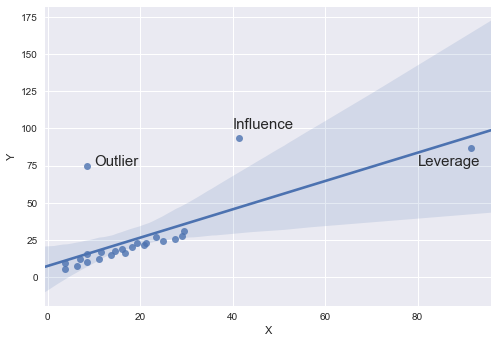

In [28]:
ax = sns.regplot('X', 'Y', data = outliers)
ax.text(10, 75, "Outlier", ha ='left', fontsize = 15)
ax.text(40, 100, "Influence", ha ='left', fontsize = 15)
ax.text(80, 75, "Leverage", ha ='left', fontsize = 15)

### 2(d) Calculate a regression (simple, linear) between X and Y

In [29]:
slope, intercept, r, p, serr = stats.linregress(outliers.X, outliers.Y)

### 2(e) Calculate the residuals for the model above, then produce the 4 univariate test plots on these residuals (histogram, run sequence, lag plot, and QQ).  For each, comment on what you're seeing and what it might mean


In [30]:
# calculate expected values & use to find residuals
expected = (slope * outliers.Y + intercept)
residuals = outliers.X - expected

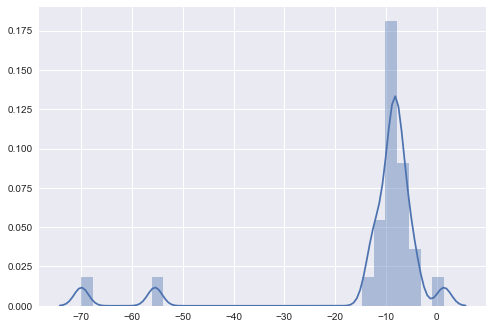

In [31]:
# histogram - test normal distribution
sns.distplot(residuals, kde=True) 

_<font color="red"> Intepretation: it appears the assumption of a common, normal distribution is violated (by the two bumps to the left)  _</font>

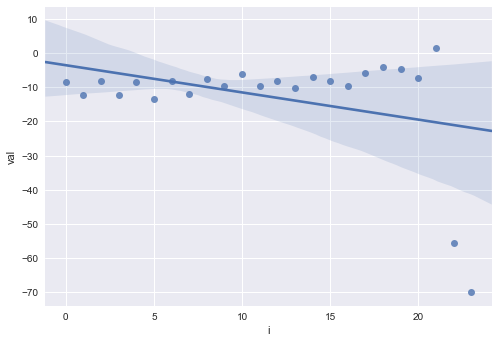

In [32]:
# run sequence - test fixed location and variation
ax = sns.regplot(np.arange(len(residuals)),residuals)
#ax.set_ylim(-10,10)
ax.set_ylabel("val")
ax.set_xlabel("i")

_<font color="red"> Interpretation: the fixed location and fixed variation assumptions are unjustified by the two outlier points in the bottom right _</font>

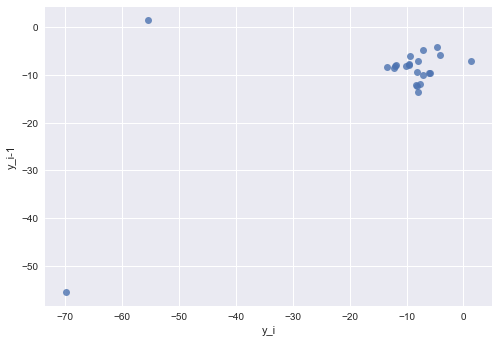

In [33]:
# lag plot - is the dataset random or not (as evidenced by a pattern)?
ax = sns.regplot(residuals[1:], residuals[:-1], fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

_<font color="red"> Interpretation: the randomness assumption is violated as shown by the non-random (clumped-together) lag plot. There is also two outliers evident on the top-left and bottom-left. _</font>

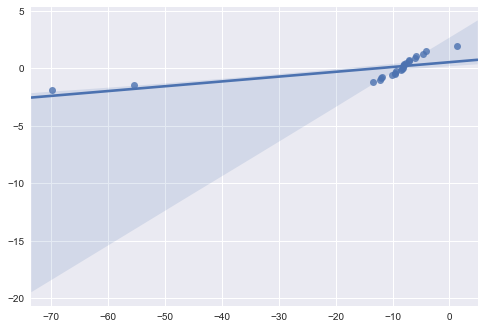

In [34]:
# QQ plot - does X and Y come from populations with a common distribution?
qntls, xr = stats.probplot(residuals, fit=False)
sns.regplot(xr,qntls)

### 2(f) Find the points with  DFFITS values that exceeds the threshold for high influence.
Remember that the threshold for DFFITS is given by $2\sqrt\frac{p}{n}$, where $p$ is the number of model parameters (in this case there are two parameters: the slope and the intercept) and $n$ is the number of points.

In [35]:
# build model
model1 = smf.ols('X ~ Y', data=outliers).fit()

In [36]:
# Perform influence test
infl1 = model1.get_influence()
infl_stats = infl1.summary_frame()
dffits = infl_stats.sort_values('dffits',ascending=False)[['dffits']]
dffits.head()

dffits
21  4.131699
19  0.139970
18  0.135014
20  0.122671
17  0.099304

In [40]:
# identify points that exceed threshold
import math
dffits[dffits['dffits'] > (2*math.sqrt(2/len(outliers)))]

dffits
21  4.131699

### 2(g) Visualize DFFITS values. Draw a horizontal line (or two) at the threshold (hint: use plt.hlines). How many points fall above the threshold?

### 2(h) Remove the outlier(s) that you found using DFFITS values (and the threshold). Calculate a new simple linear model based on this data.

### 2(i) Plot the old and new regression lines together. Report your observations.

### 2(j) Create code to normalize the cleaned (outliers removed) X values and Y values to [0, 1]. Then, create a scatterplot of X and Y.